# Downloading and organizing the data

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"junaidio","key":"501b6112c0040dbe0263fb0a5da8ced2"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d samithsachidanandan/human-face-emotions


Dataset URL: https://www.kaggle.com/datasets/samithsachidanandan/human-face-emotions
License(s): apache-2.0
 99% 692M/701M [00:01<00:00, 276MB/s]
100% 701M/701M [00:02<00:00, 363MB/s]


In [ ]:
!unzip human-face-emotions.zip -d /content/dataset_raw


In [ ]:
import os

base_dir = "/content/dataset"
train_path = os.path.join(base_dir, "train")
val_path = os.path.join(base_dir, "val")

os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)

print("Train Path:", train_path)
print("Validation Path:", val_path)


Train Path: /content/dataset/train
Validation Path: /content/dataset/val


In [ ]:
import os
import random
import shutil

source_path = "/content/dataset_raw/Data"  # adjust if needed
classes = os.listdir(source_path)

TRAIN_IMAGES = 6000
VAL_IMAGES = 2000

for cls in classes:
    class_src = os.path.join(source_path, cls)
    images = os.listdir(class_src)

    if len(images) < TRAIN_IMAGES + VAL_IMAGES:
        print(f"WARNING: Class '{cls}' doesn't have enough images.")

    random.shuffle(images)

    train_imgs = images[:TRAIN_IMAGES]
    val_imgs = images[TRAIN_IMAGES:TRAIN_IMAGES + VAL_IMAGES]

    class_train_dir = os.path.join(train_path, cls)
    os.makedirs(class_train_dir, exist_ok=True)

    class_val_dir = os.path.join(val_path, cls)
    os.makedirs(class_val_dir, exist_ok=True)

    # Copy images
    for img in train_imgs:
        shutil.copy(os.path.join(class_src, img), os.path.join(class_train_dir, img))

    for img in val_imgs:
        shutil.copy(os.path.join(class_src, img), os.path.join(class_val_dir, img))

print("Dataset successfully organized.")


Dataset successfully organized.


In [ ]:
for cls in classes:
    print(cls,
          " Train:", len(os.listdir(os.path.join(train_path, cls))),
          " Val:", len(os.listdir(os.path.join(val_path, cls))))


Sad  Train: 6000  Val: 2000
Fear  Train: 6000  Val: 2000
Happy  Train: 6000  Val: 2000
Angry  Train: 6000  Val: 2000
Suprise  Train: 6000  Val: 2000


# Creating Dataset and data loader

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
train_path = "/content/dataset/train"
test_path  = "/content/dataset/val"

# Different transformations for train & test

In [ ]:
train_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])



test_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


# Creating dataset

In [ ]:
class Facial_Dataset(Dataset):
  def __init__(self, dir_path, transform=None):
    self.data = ImageFolder(dir_path, transform=transform)

  def __len__(self):
    return len(self.data)

  def __getitem__(self, index):
    return self.data[index]

In [ ]:
train_set = Facial_Dataset(dir_path=train_path, transform=train_transforms)
test_set  = Facial_Dataset(dir_path=test_path, transform=test_transforms)

In [ ]:
print(f"Size of training dataset: {len(train_set)}")
print(f"Size of testing dataset: {len(test_set)}")

Size of training dataset: 30000
Size of testing dataset: 10000


# Plotting the data distribution

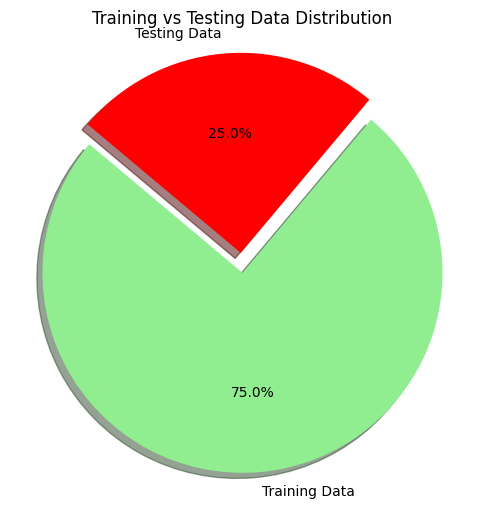

In [ ]:
labels = ['Training Data', 'Testing Data']
sizes  = [len(train_set), len(test_set)]
colors = ['lightgreen', 'red']
explode = (0.1, 0)
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Training vs Testing Data Distribution')
plt.axis('equal')
plt.show()

In [ ]:
train_set.data.classes

['Angry', 'Fear', 'Happy', 'Sad', 'Suprise']

In [ ]:
train_set.data.class_to_idx

{'Angry': 0, 'Fear': 1, 'Happy': 2, 'Sad': 3, 'Suprise': 4}

In [ ]:
for image, label in train_set:
  print(image, label)
  break

tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1

In [ ]:
idx_to_class = {
    0: "Angry'",
    1: "Fear",
    2: "Happy",
    3: "Sad",
    4: "Suprise"
}

# Plotting some images

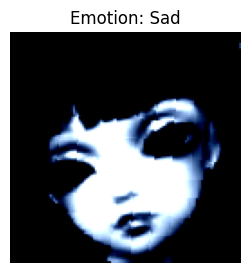

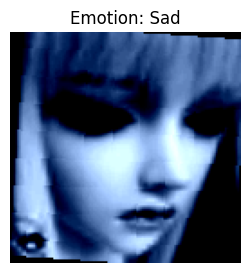

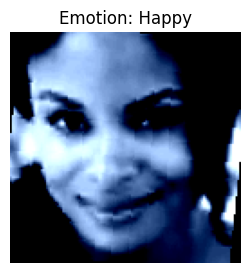

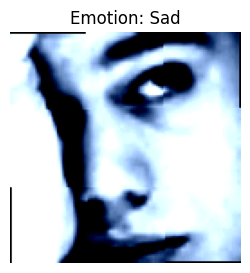

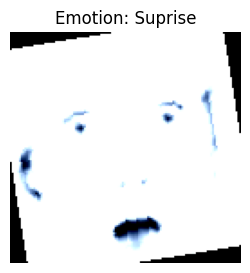

In [ ]:
for i in range(5):
    idx = random.randint(0, len(train_set) - 1)
    img, label = train_set[idx]
    img = img.permute(1, 2, 0)

    plt.figure(figsize=(3,3))
    plt.imshow(img)
    plt.title(f"Emotion: {idx_to_class[label]}")
    plt.axis("off")
    plt.show()

# Creating the data loader

In [ ]:
train_loader = DataLoader(train_set, batch_size=64, shuffle=True, num_workers=4)
eval_loader = DataLoader(test_set, batch_size=64, num_workers=4)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


# Building the cnn model

# i will start with custom cnn and then move to the transfer learning

In [ ]:
class Face_Expression_CNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(128, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )

        self.pool = nn.AdaptiveAvgPool2d((1,1)) 

        self.classifier = nn.Sequential(
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
custom_cnn = Face_Expression_CNN(num_classes=5).to(device)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = torch.optim.Adam(custom_cnn.parameters(), lr=0.001, weight_decay=1e-4)

# Training and Evaluation loop

In [ ]:
epochs = 30
train_losses = []

for epoch in range(epochs):
  custom_cnn.train()
  running_loss = 0
  total        = 0
  correct      = 0

  for images, labels in tqdm(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    outputs = custom_cnn(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    total += len(labels)

    _, preds = torch.max(outputs, dim=1)
    correct += (preds == labels).sum().item()

  accuracy = (correct / total)
  train_loss = running_loss / len(train_loader)
  train_losses.append(train_loss)
  print(f"Epoch : {epoch + 1}, Training Loss : {train_loss},  Accuracy : {accuracy:.2f}%")

100%|██████████| 469/469 [01:44<00:00,  4.49it/s]


Epoch : 1, Training Loss : 1.5394971027557276,  Accuracy : 0.31%


100%|██████████| 469/469 [01:43<00:00,  4.52it/s]


Epoch : 2, Training Loss : 1.4489951390447393,  Accuracy : 0.38%


100%|██████████| 469/469 [01:42<00:00,  4.56it/s]


Epoch : 3, Training Loss : 1.404533931695576,  Accuracy : 0.42%


100%|██████████| 469/469 [01:42<00:00,  4.59it/s]


Epoch : 4, Training Loss : 1.3642401672375482,  Accuracy : 0.44%


100%|██████████| 469/469 [01:43<00:00,  4.54it/s]


Epoch : 5, Training Loss : 1.327559105114642,  Accuracy : 0.47%


100%|██████████| 469/469 [01:42<00:00,  4.56it/s]


Epoch : 6, Training Loss : 1.2998827281537086,  Accuracy : 0.49%


100%|██████████| 469/469 [01:42<00:00,  4.58it/s]


Epoch : 7, Training Loss : 1.2711489991084346,  Accuracy : 0.51%


100%|██████████| 469/469 [01:42<00:00,  4.58it/s]


Epoch : 8, Training Loss : 1.2458130255945201,  Accuracy : 0.53%


100%|██████████| 469/469 [01:43<00:00,  4.51it/s]


Epoch : 9, Training Loss : 1.22604267353188,  Accuracy : 0.54%


100%|██████████| 469/469 [01:44<00:00,  4.50it/s]


Epoch : 10, Training Loss : 1.2063896818710034,  Accuracy : 0.56%


100%|██████████| 469/469 [01:43<00:00,  4.52it/s]


Epoch : 11, Training Loss : 1.185566740884964,  Accuracy : 0.57%


100%|██████████| 469/469 [01:43<00:00,  4.53it/s]


Epoch : 12, Training Loss : 1.173922930317901,  Accuracy : 0.57%


100%|██████████| 469/469 [01:42<00:00,  4.56it/s]


Epoch : 13, Training Loss : 1.157750137197946,  Accuracy : 0.59%


100%|██████████| 469/469 [01:42<00:00,  4.58it/s]


Epoch : 14, Training Loss : 1.1478024140349838,  Accuracy : 0.59%


100%|██████████| 469/469 [01:42<00:00,  4.56it/s]


Epoch : 15, Training Loss : 1.135584201894081,  Accuracy : 0.60%


100%|██████████| 469/469 [01:42<00:00,  4.56it/s]


Epoch : 16, Training Loss : 1.1225818157958578,  Accuracy : 0.61%


100%|██████████| 469/469 [01:42<00:00,  4.57it/s]


Epoch : 17, Training Loss : 1.1154435686211088,  Accuracy : 0.61%


100%|██████████| 469/469 [01:43<00:00,  4.53it/s]


Epoch : 18, Training Loss : 1.1048913530703546,  Accuracy : 0.62%


100%|██████████| 469/469 [01:43<00:00,  4.52it/s]


Epoch : 19, Training Loss : 1.0923462173323641,  Accuracy : 0.63%


100%|██████████| 469/469 [01:44<00:00,  4.50it/s]


Epoch : 20, Training Loss : 1.0878032791589114,  Accuracy : 0.63%


100%|██████████| 469/469 [01:42<00:00,  4.58it/s]


Epoch : 21, Training Loss : 1.0788342373203368,  Accuracy : 0.64%


100%|██████████| 469/469 [01:43<00:00,  4.54it/s]


Epoch : 22, Training Loss : 1.070894734310443,  Accuracy : 0.64%


100%|██████████| 469/469 [01:49<00:00,  4.29it/s]


Epoch : 23, Training Loss : 1.0646319158041655,  Accuracy : 0.65%


100%|██████████| 469/469 [01:43<00:00,  4.55it/s]


Epoch : 24, Training Loss : 1.0558876381245756,  Accuracy : 0.65%


100%|██████████| 469/469 [01:43<00:00,  4.53it/s]


Epoch : 25, Training Loss : 1.0449805956151186,  Accuracy : 0.66%


100%|██████████| 469/469 [01:42<00:00,  4.56it/s]


Epoch : 26, Training Loss : 1.0337240362980726,  Accuracy : 0.67%


100%|██████████| 469/469 [01:43<00:00,  4.52it/s]


Epoch : 27, Training Loss : 1.032928537331156,  Accuracy : 0.67%


100%|██████████| 469/469 [01:42<00:00,  4.57it/s]


Epoch : 28, Training Loss : 1.024788031318803,  Accuracy : 0.67%


100%|██████████| 469/469 [01:41<00:00,  4.61it/s]


Epoch : 29, Training Loss : 1.019930018926226,  Accuracy : 0.68%


100%|██████████| 469/469 [01:42<00:00,  4.56it/s]

Epoch : 30, Training Loss : 1.0120796365524405,  Accuracy : 0.68%


In [ ]:
custom_cnn.eval()
total = 0
correct = 0
accuracies = []
all_preds = []
all_labels = []

with torch.no_grad():
  for images, labels in tqdm(eval_loader):
    images = images.to(device)
    labels = labels.to(device)

    outputs = custom_cnn(images)
    _, preds = torch.max(outputs, dim=1)

    total += len(labels)
    correct += (preds == labels).sum().item()
    accuracies.append(correct/total)

    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

val_accuracy = (correct / total)
print(f"Evaluation Accuracy : {val_accuracy:.4f}%")

100%|██████████| 157/157 [00:26<00:00,  6.03it/s]

Evaluation Accuracy : 0.6537%


# Plotting the process

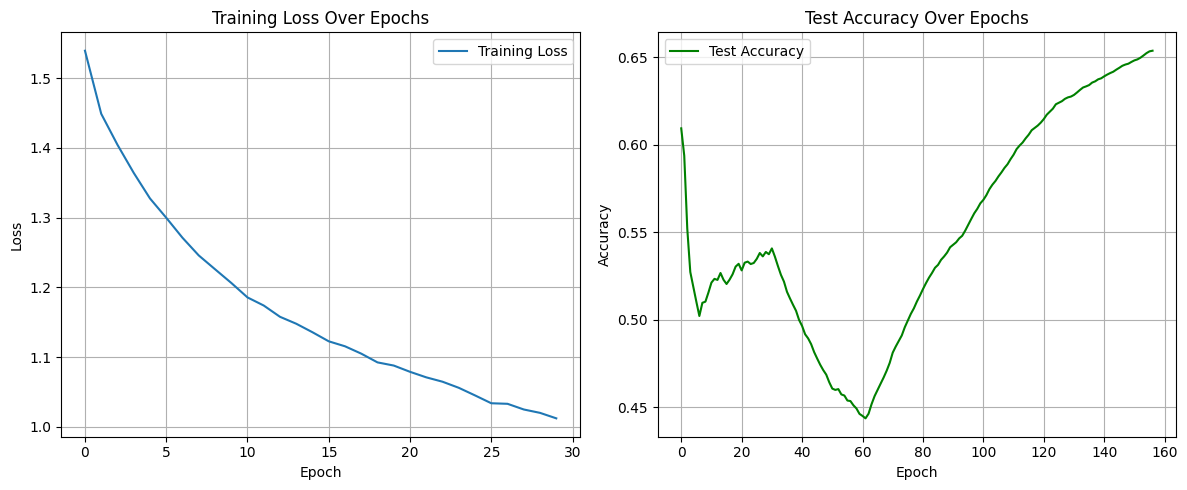

In [ ]:
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Test Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Over Epochs')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Evaluating the metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
class_names = eval_loader.dataset.data.classes
print(classification_report(all_labels, all_preds, target_names=class_names))

              precision    recall  f1-score   support

       Angry       0.73      0.54      0.62      2000
        Fear       0.59      0.35      0.44      2000
       Happy       0.90      0.75      0.82      2000
         Sad       0.45      0.85      0.59      2000
     Suprise       0.82      0.78      0.80      2000

    accuracy                           0.65     10000
   macro avg       0.70      0.65      0.65     10000
weighted avg       0.70      0.65      0.65     10000



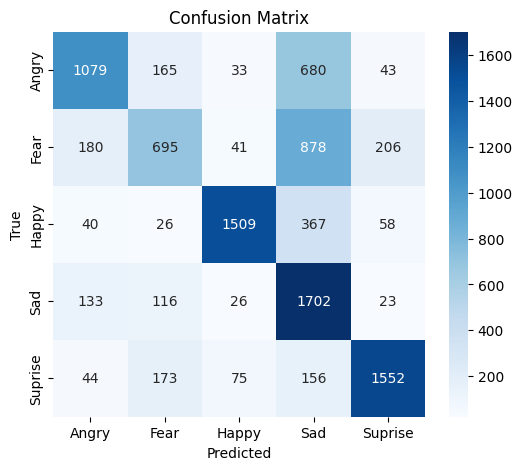

In [ ]:
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Transfer learning with resnet 18

In [ ]:
from torchvision import models

In [ ]:
class FaceExpressionResnet(nn.Module):
    def __init__(self, num_classes):
        super().__init__()

        self.model = models.resnet18(weights="DEFAULT")

        for param in self.model.parameters():
            param.requires_grad = False

        for param in self.model.layer4.parameters():
            param.requires_grad = True

        for module in self.model.modules():
            if isinstance(module, nn.BatchNorm2d):
                for param in module.parameters():
                    param.requires_grad = True

        self.model.fc = nn.Sequential(
            nn.Dropout(0.4),
            nn.Linear(self.model.fc.in_features, num_classes)
        )


    def forward(self, x):
        return self.model(x)

In [ ]:
model = FaceExpressionResnet(num_classes=5).to(device)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.002, weight_decay=1e-4)

# Training and Evaluation loop

In [ ]:
epochs = 15
train_losses = []

for epoch in range(epochs):
  model.train()
  running_loss = 0
  total        = 0
  correct      = 0

  for images, labels in tqdm(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    total += len(labels)

    _, preds = torch.max(outputs, dim=1)
    correct += (preds == labels).sum().item()

  accuracy = (correct / total)
  train_loss = running_loss / len(train_loader)
  train_losses.append(train_loss)
  print(f"Epoch : {epoch + 1}, Training Loss : {train_loss},  Accuracy : {accuracy:.2f}%")

100%|██████████| 469/469 [01:45<00:00,  4.43it/s]


Epoch : 1, Training Loss : 1.038594721222737,  Accuracy : 0.66%


100%|██████████| 469/469 [01:44<00:00,  4.49it/s]


Epoch : 2, Training Loss : 0.9658341045572814,  Accuracy : 0.70%


100%|██████████| 469/469 [01:43<00:00,  4.52it/s]


Epoch : 3, Training Loss : 0.903845891642418,  Accuracy : 0.74%


100%|██████████| 469/469 [01:44<00:00,  4.48it/s]


Epoch : 4, Training Loss : 0.847595224756676,  Accuracy : 0.77%


100%|██████████| 469/469 [01:44<00:00,  4.49it/s]


Epoch : 5, Training Loss : 0.7910007064276413,  Accuracy : 0.80%


100%|██████████| 469/469 [01:45<00:00,  4.45it/s]


Epoch : 6, Training Loss : 0.7394698576123984,  Accuracy : 0.83%


100%|██████████| 469/469 [01:44<00:00,  4.48it/s]


Epoch : 7, Training Loss : 0.6917613146782938,  Accuracy : 0.86%


100%|██████████| 469/469 [01:44<00:00,  4.49it/s]


Epoch : 8, Training Loss : 0.6530539641248138,  Accuracy : 0.88%


100%|██████████| 469/469 [01:45<00:00,  4.47it/s]


Epoch : 9, Training Loss : 0.6186823048698369,  Accuracy : 0.90%


100%|██████████| 469/469 [01:44<00:00,  4.50it/s]


Epoch : 10, Training Loss : 0.5969803963642893,  Accuracy : 0.91%


100%|██████████| 469/469 [01:43<00:00,  4.51it/s]


Epoch : 11, Training Loss : 0.5708201158402572,  Accuracy : 0.92%


100%|██████████| 469/469 [01:45<00:00,  4.46it/s]


Epoch : 12, Training Loss : 0.5566300507674593,  Accuracy : 0.93%


100%|██████████| 469/469 [01:44<00:00,  4.47it/s]


Epoch : 13, Training Loss : 0.5434983380949066,  Accuracy : 0.93%


100%|██████████| 469/469 [01:44<00:00,  4.51it/s]


Epoch : 14, Training Loss : 0.5290097056040123,  Accuracy : 0.94%


100%|██████████| 469/469 [01:44<00:00,  4.47it/s]

Epoch : 15, Training Loss : 0.5175092558362591,  Accuracy : 0.95%


In [ ]:
model.eval()
total = 0
correct = 0
accuracies = []
all_preds = []
all_labels = []

with torch.no_grad():
  for images, labels in tqdm(eval_loader):
    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)
    _, preds = torch.max(outputs, dim=1)

    total += len(labels)
    correct += (preds == labels).sum().item()
    accuracies.append(correct/total)

    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

val_accuracy = (correct / total)
print(f"Evaluation Accuracy : {val_accuracy:.4f}%")

100%|██████████| 157/157 [00:27<00:00,  5.77it/s]

Evaluation Accuracy : 0.8397%


# Plotting the process

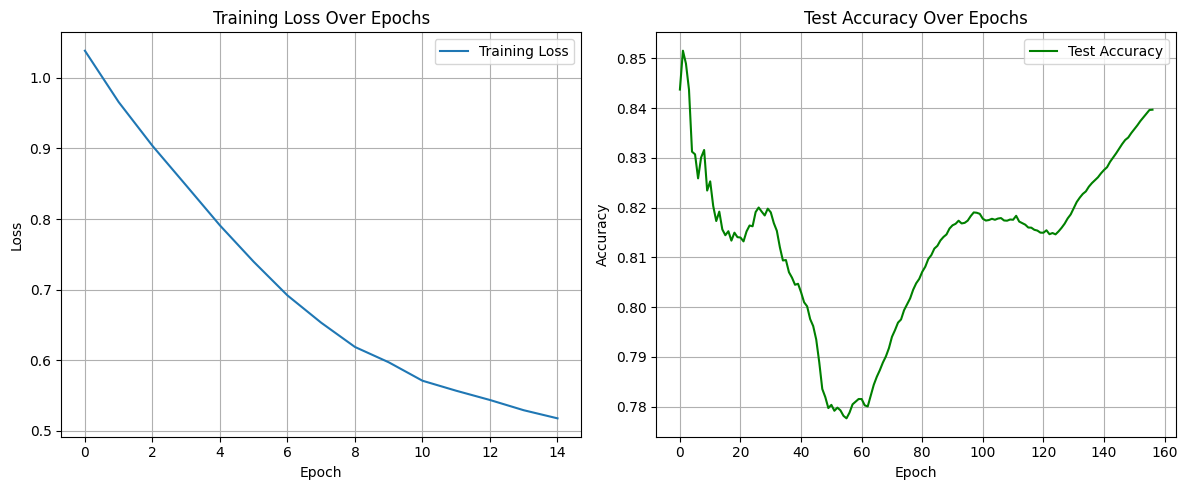

In [ ]:
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Test Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Over Epochs')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Evaluating the metrics

In [ ]:
class_names = eval_loader.dataset.data.classes
print(classification_report(all_labels, all_preds, target_names=class_names))

              precision    recall  f1-score   support

       Angry       0.83      0.82      0.82      2000
        Fear       0.82      0.74      0.78      2000
       Happy       0.91      0.89      0.90      2000
         Sad       0.75      0.81      0.78      2000
     Suprise       0.90      0.94      0.92      2000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



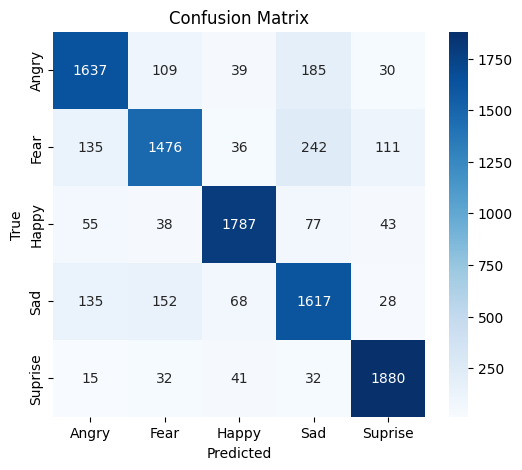

In [ ]:
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Saving the model

In [ ]:
torch.save(model.state_dict(), "FaceExpressionResnet_18.pth")